In [131]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [132]:
dir = 'C:\\Users\\Rawan Khaled\\Desktop\\Graduation Project\\train'

categories = ['iron_pillar','qutub_minar','alai_darwaza']

data = []

for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        Datimage = cv2.imread(imgpath,0)
        Datimage = cv2.resize(Datimage,(50,50))
        image = np.array(Datimage).flatten()
        
        data.append([image,label])
        
pick_in = open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()


In [136]:
random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.20)
model = SVC(C=1,kernel='linear', gamma='auto')
model.fit(xtrain,ytrain)

svm_model=open('svm_model.sav','wb')
pickle.dump(model,svm_model)
svm_model.close()


In [137]:

pick_in = open('data1.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

Accuracy:  0.6114285714285714
Prediction is:  qutub_minar


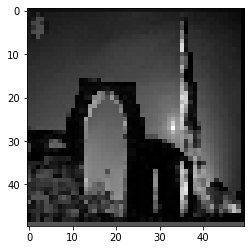

In [138]:
svm_read=open('svm_model.sav','rb')
model=pickle.load(svm_read)
svm_read.close()

prediction=model.predict(xtest)
accuracy = model.score(xtest,ytest)

categories = ['iron_pillar','qutub_minar','alai_darwaza']

print('Accuracy: ',accuracy)
print('Prediction is: ',categories[prediction[0]])

my_classify=xtest[0].reshape(50,50)
plt.imshow(my_classify,cmap='gray')
plt.show()

In [139]:
from sklearn import svm
from sklearn.metrics import classification_report
clf = svm.SVC(kernel='linear')
clf.fit(xtrain, ytrain)
y_pred = clf.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
print("Precision:",metrics.precision_score(ytest, y_pred, pos_label='positive',average= 'weighted'))
print("Recall:",metrics.recall_score(ytest, y_pred,pos_label='positive',average= 'weighted'))


Accuracy: 0.6114285714285714
Precision: 0.6043867911537084
Recall: 0.6114285714285714


C:\Users\Rawan Khaled\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
